<a href="https://colab.research.google.com/github/yerinsally/2022_PythonML/blob/main/5_3_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8%EA%B3%BC_%EC%84%B8%EB%B6%80%ED%8A%9C%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 기본적인 라이브러리 선언
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1. 데이터 불러오기와 데이터셋 나누기

In [ ]:
# 일반적인 경고 메세지는 무시함
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# One-hot Coding과 연속데이터 스케일링을 수행한 Fvote.cav 파일을 불러옴
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/Fvote.csv', encoding='utf-8')

In [ ]:
# 입력에 해당하는 feature들을 X로 저장함
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [ ]:
# 출력에 해당하는 레이블 중에서 vote만 y로 저장함
y=data[['vote']]

In [ ]:
# 데이터를 Train와 Test 셋으로 분리하기 위한 라이브러리를 선언함
from sklearn.model_selection import train_test_split

In [ ]:
# Train셋을 X_train, y_train으로 저장하고, Test 셋으로 X_test, y_test으로 저장함
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42 )

# 2. Grid Search 

In [ ]:
# 모델 훈련을 위해 GridSearchCV를 선언
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearch의 범위를 1~10으로 지정
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [ ]:
# KNN 알고리즘 적용을 위한 라이브러리 선언
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN 알고리즘에 GridSearch를 적용
# n_neighbors(parameter) : param_grid 넣기
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
# param_grid = n_neighbors가 한 값이 아니라 1~10까지 돌려보기
# return_train_score = True 조건 넣기

In [ ]:
# Train 데이터에 GridSearch를 적용 -> 모델 만들기
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [ ]:
# best parameter : 가장 좋은 결과를 얻는 그리드를 출력
print("Best Parameter: {}".format(grid_search.best_params_))
# grid_search. 뒤에 _ 있으면 고유변수 나타냄

Best Parameter: {'n_neighbors': 7}


In [ ]:
# grid_search의 최종 스코어를 출력
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.671


In [ ]:
# Test 데이터에 대해 grid_search 알고리즘을 적용
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.623


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)
# 리스트 형태를 데이터프레임으로

In [ ]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004000,0.000331,0.003853,0.000112,1,{'n_neighbors': 1},0.65625,0.65625,0.56250,0.580645,...,0.620161,0.040289,6,1.000000,0.992063,1.000000,0.992126,0.992126,0.995263,0.003868
1,0.003800,0.000115,0.003992,0.000455,2,{'n_neighbors': 2},0.43750,0.56250,0.50000,0.451613,...,0.512903,0.066436,10,0.825397,0.825397,0.777778,0.779528,0.811024,0.803825,0.021219
2,0.004681,0.001069,0.004791,0.001092,3,{'n_neighbors': 3},0.56250,0.62500,0.56250,0.612903,...,0.601613,0.033557,7,0.801587,0.809524,0.817460,0.826772,0.803150,0.811699,0.009386
3,0.003904,0.000121,0.003819,0.000067,4,{'n_neighbors': 4},0.50000,0.59375,0.59375,0.483871,...,0.556855,0.053709,9,0.769841,0.746032,0.738095,0.740157,0.755906,0.750006,0.011687
4,0.003979,0.000288,0.004389,0.001098,5,{'n_neighbors': 5},0.65625,0.71875,0.62500,0.645161,...,0.664516,0.031976,2,0.785714,0.809524,0.753968,0.787402,0.755906,0.778503,0.021005
5,0.003879,0.000087,0.004345,0.001135,6,{'n_neighbors': 6},0.53125,0.68750,0.62500,0.483871,...,0.594556,0.075346,8,0.730159,0.793651,0.738095,0.771654,0.700787,0.746869,0.032504
6,0.003895,0.000099,0.003842,0.000045,7,{'n_neighbors': 7},0.65625,0.71875,0.65625,0.645161,...,0.670766,0.026168,1,0.746032,0.753968,0.738095,0.748031,0.732283,0.743682,0.007634
7,0.003812,0.000076,0.003874,0.000137,8,{'n_neighbors': 8},0.62500,0.68750,0.62500,0.612903,...,0.632661,0.027948,5,0.746032,0.730159,0.753968,0.771654,0.685039,0.737370,0.029382
8,0.003877,0.000084,0.003839,0.000077,9,{'n_neighbors': 9},0.62500,0.68750,0.68750,0.645161,...,0.664516,0.025136,2,0.753968,0.753968,0.738095,0.724409,0.700787,0.734246,0.020045
9,0.003881,0.000073,0.003817,0.000072,10,{'n_neighbors': 10},0.56250,0.68750,0.65625,0.645161,...,0.632863,0.042504,4,0.738095,0.746032,0.722222,0.732283,0.700787,0.727884,0.015616


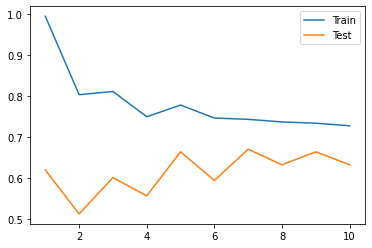

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()
# 7일때 test_score가 가장 높고, train_score와 차이 얼마 안남

# 3. Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
# n_neighbors에 최소, 최대 주기
param_distribs = {'n_neighbors': randint(low=1, high=20)}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions = param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3439e8c590>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 18}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.703


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.717


In [ ]:
result_random = pd.DataFrame(random_search.cv_results_)

In [ ]:
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004261,0.000390,0.004029,0.000271,12,{'n_neighbors': 12},0.65625,0.68750,0.68750,0.709677,...,0.677218,0.023377,3,0.722222,0.738095,0.746032,0.763780,0.740157,0.742057,0.013419
1,0.004265,0.000380,0.004029,0.000135,9,{'n_neighbors': 9},0.62500,0.68750,0.68750,0.645161,...,0.664516,0.025136,4,0.753968,0.753968,0.738095,0.724409,0.700787,0.734246,0.020045
2,0.004251,0.000316,0.004741,0.001474,9,{'n_neighbors': 9},0.62500,0.68750,0.68750,0.645161,...,0.664516,0.025136,4,0.753968,0.753968,0.738095,0.724409,0.700787,0.734246,0.020045
3,0.004219,0.000199,0.004132,0.000358,4,{'n_neighbors': 4},0.50000,0.59375,0.59375,0.483871,...,0.556855,0.053709,8,0.769841,0.746032,0.738095,0.740157,0.755906,0.750006,0.011687
4,0.004605,0.001186,0.004539,0.000964,6,{'n_neighbors': 6},0.53125,0.68750,0.62500,0.483871,...,0.594556,0.075346,7,0.730159,0.793651,0.738095,0.771654,0.700787,0.746869,0.032504
5,0.004579,0.001120,0.004205,0.000440,18,{'n_neighbors': 18},0.65625,0.68750,0.71875,0.741935,...,0.702823,0.029101,1,0.714286,0.753968,0.722222,0.708661,0.748031,0.729434,0.018225
6,0.004040,0.000197,0.004133,0.000196,16,{'n_neighbors': 16},0.71875,0.68750,0.71875,0.741935,...,0.702419,0.033454,2,0.730159,0.730159,0.738095,0.748031,0.732283,0.735746,0.006795
7,0.004002,0.000125,0.004087,0.000392,2,{'n_neighbors': 2},0.43750,0.56250,0.50000,0.451613,...,0.512903,0.066436,9,0.825397,0.825397,0.777778,0.779528,0.811024,0.803825,0.021219
8,0.004791,0.001264,0.004770,0.001089,2,{'n_neighbors': 2},0.43750,0.56250,0.50000,0.451613,...,0.512903,0.066436,9,0.825397,0.825397,0.777778,0.779528,0.811024,0.803825,0.021219
9,0.006308,0.000287,0.006243,0.000258,9,{'n_neighbors': 9},0.62500,0.68750,0.68750,0.645161,...,0.664516,0.025136,4,0.753968,0.753968,0.738095,0.724409,0.700787,0.734246,0.020045


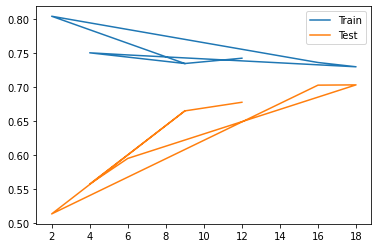

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

In [ ]:
# 결과 csv로 저장
# result_random.to_csv('result_random.csv', sep=',', encoding = 'utf-8')